# Plot results files #

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams.update({'font.size' : 20})

In [3]:
#WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\ATA001_Atlantic\03_CFD\05_PostProcess\1A_Wet2Dry\Fine_mesh\Thermal\PDF-MHLF-125'
#scenario='1A'
WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\ATA001_Atlantic\03_CFD\05_PostProcess\1A_Wet2Dry\Transient\Time_06e-4'
scenario='1A'
#WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\ATA001_Atlantic\03_CFD\05_PostProcess\1B_Wet2Dry'
#scenario='1B'
#### Wind velocity
vel='8.9ms'
#vel='3.61ms'
#### Tip type
tip='dry'  
#tip='wet'
file_oxygen=r'oxygen-average.csv'
file_vy=r'vy-average.csv'
#file_vx=
#file_vz=
#file_oxygen=r'oxygen-point-'+ tip + '-'+ vel + '.out'
#file_temp=r'temp-point-' + tip + '-'+ vel +'.out'
case_ox=os.path.join(WorkingDir,file_oxygen)
case_vy=os.path.join(WorkingDir,file_vy)


For inverted data

In [4]:
#data_ox_t= pd.read_csv(case_ox, sep=' ', skiprows=3, names=['iter','6m','4m','2m','0m'])
#data_ox = data_ox_t[['iter','0m','2m','4m','6m']]

In [5]:
#data_temp_t= pd.read_csv(case_temp, sep=' ', skiprows=3, names=['iter','6m','4m','2m','0m'])
#data_temp=data_temp_t[['iter','0m','2m','4m','6m']]

For straight data

In [6]:
data_ox= pd.read_csv(case_ox, sep=',') #, names=['iter','0m','2m','4m','6m'])

In [7]:
data_ox['1.5_meter']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
16649    0.001701
16650    0.001701
16651    0.001701
16652    0.001701
16653    0.001701
Name: 1.5_meter, Length: 16654, dtype: float64

In [8]:
data_vy= pd.read_csv(case_vy, sep=',')

In [9]:
data_ox.dtypes

time_step      int64
flange       float64
1.5_meter    float64
8.0_meter    float64
flow_time    float64
dtype: object

In [10]:
dt_ox=data_ox.select_dtypes(exclude=['int64'])

In [11]:
dt_vy=data_vy.select_dtypes(exclude=['int64'])

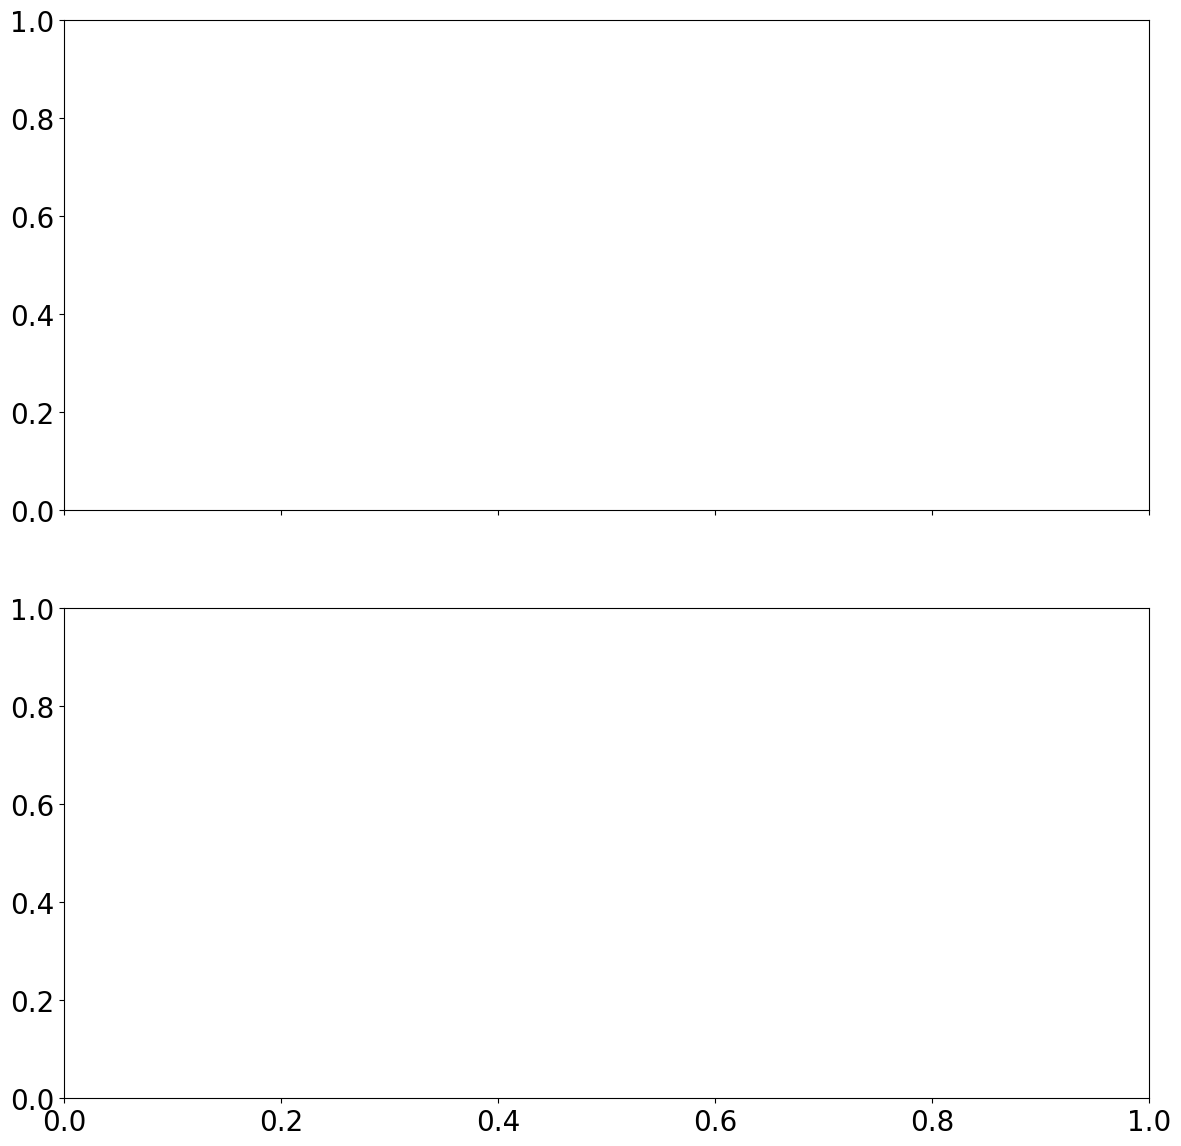

In [12]:
fig, axs = plt.subplots(2,1, figsize=(14,14),sharex=True)

In [13]:
plt.ioff()

In [14]:
fig, axs = plt.subplots(2,1, figsize=(14,16),sharex=True)

In [15]:
fig.suptitle('Transient -- Scenario-'+scenario +' '+ tip +'_Tip-'+ vel,fontsize='x-large')

Text(0.5, 0.98, 'Transient -- Scenario-1A dry_Tip-8.9ms')

In [16]:
#axs[0].plot(dt_ox, label=['0m','2m')

In [17]:
axs[0].plot(dt_ox['flow_time'],dt_ox['1.5_meter']*100,label=['1.5_meters'], linewidth=3,color='tab:orange')
axs[0].plot(dt_ox['flow_time'],dt_ox['flange']*100, label=['flange'], linewidth=3, color='tab:blue')
axs[0].plot(dt_ox['flow_time'],dt_ox['8.0_meter']*100, label=['8.0_meters'], linewidth=3, color='tab:red')

In [18]:
axs[0].set_title('Oxygen Concentration')

Text(0.5, 1.0, 'Oxygen Concentration')

In [19]:
axs[0].set_ylabel(r'$O_2$ [%]')

Text(0, 0.5, '$O_2$ [%]')

In [20]:
axs[0].legend(loc='upper left')

In [21]:
axs[1].plot(dt_vy['flow_time'],dt_vy['tip_exit'],label=['tip_exit'], linewidth=3, color='tab:cyan')
axs[1].plot(dt_vy['flow_time'],dt_vy['1.5_meter'], label=['1.5_meter'], linewidth=3,color='tab:orange')
axs[1].plot(dt_vy['flow_time'],dt_vy['seal_exit'], label=['seal_exit'], linewidth=3,color='tab:blue')
axs[1].plot(dt_vy['flow_time'],np.full(len(dt_vy['flow_time']),0.012), linewidth=3, linestyle='dashed', color='tab:red', label='$V_{max}=0.012 \; [m/s]$')
axs[1].plot(dt_vy['flow_time'],np.full(len(dt_vy['flow_time']),0.006), linewidth=3, linestyle='dashed', color='tab:purple', label='$V_{min}=0.006 \; [m/s]$')

In [22]:
axs[1].set_title('Velocity normal to section')

Text(0.5, 1.0, 'Velocity normal to section')

In [23]:
axs[1].set_ylabel(r'$v_y \; [m/s]$')

Text(0, 0.5, '$v_y \\; [m/s]$')

In [24]:
axs[1].set_xlabel('flow time [s]')

Text(0.5, 0, 'flow time [s]')

In [25]:
axs[1].legend(loc='upper right')

In [26]:
figureName='figure-'+scenario+'-'+tip+'-'+vel+'.png'

In [27]:
figurePath=os.path.join(WorkingDir,figureName)

In [28]:
print(figurePath)

C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\ATA001_Atlantic\03_CFD\05_PostProcess\1A_Wet2Dry\Transient\Time_06e-4\figure-1A-dry-8.9ms.png


In [29]:
plt.savefig(figurePath)

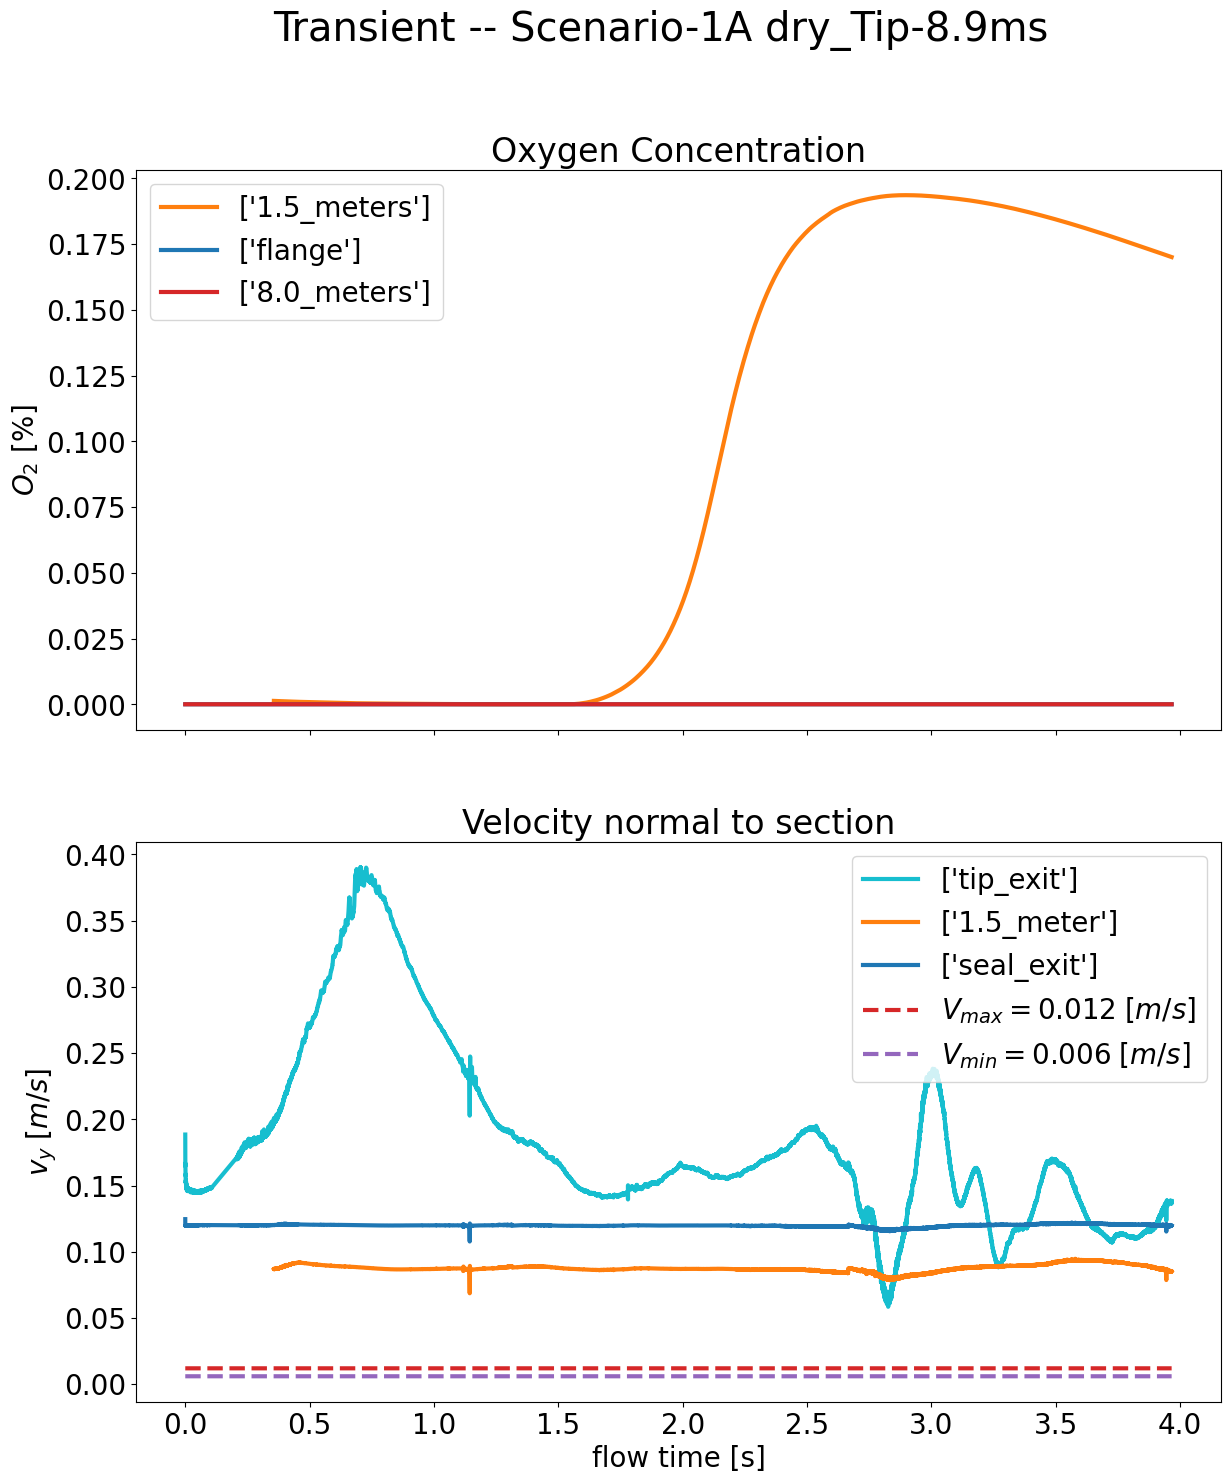

In [30]:
plt.show()